# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

Which variables would we need to **dummify**?

In [9]:
!pip install palmerpenguins
from palmerpenguins import load_penguins
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

In [10]:
penguins = load_penguins()
penguins.head()
#dummify categorical variables-species, island, sex

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [11]:
print("The variables we would want to dummify are 'species', 'island', 'sex'")

The variables we would want to dummify are 'species', 'island', 'sex'


Let's use `bill_length_mm` to predict `bill_depth_mm`. Prepare your data and fit the following models on the entire dataset:

* Simple linear regression (e.g. straight-line) model
* Quadratic (degree 2 polynomial) model
* Cubic (degree 3 polynomial) model
* Degree 10 polynomial model

Make predictions for each model and plot your fitted models on the scatterplot.

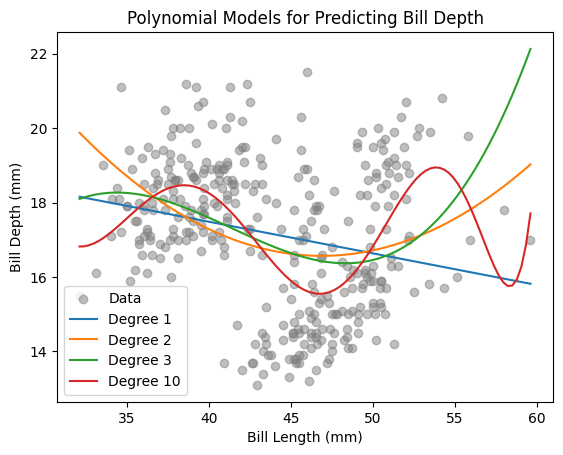

In [12]:
penguins = penguins.dropna(subset=['bill_length_mm', 'bill_depth_mm'])
X = penguins[['bill_length_mm']].to_numpy()  # Independent variable
y = penguins['bill_depth_mm'].to_numpy()     # Dependent variable

# Define the polynomial degrees
degrees = [1, 2, 3, 10]

# Plot the scatterplot of the data
plt.scatter(X, y, color='gray', alpha=0.5, label='Data')
x_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)

# Fit and plot each model
for degree in degrees:
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X, y)
    y_pred = model.predict(x_range)
    plt.plot(x_range, y_pred, label=f'Degree {degree}')

plt.xlabel('Bill Length (mm)')
plt.ylabel('Bill Depth (mm)')
plt.legend()
plt.title('Polynomial Models for Predicting Bill Depth')
plt.show()

* Are any of the models above underfitting the data? If so, which ones and how can you tell?
* Are any of thhe models above overfitting the data? If so, which ones and how can you tell?
* Which of the above models do you think fits the data best and why?

Out of the different models, I would say the degree 1 model may underfit because it does not take into account the curvature of the data. I think that the degree 10 model may be overtfit because of the amount of bends in its curve, which may be more for the quirks of this dataset and may not apply to other datasets. I think that the degree 2 model fits the data best because of how its curvature fits the data points.